In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Neural Nets As Universal Approximators

## Activation Function: From Threshold to Sigmoid
we choose a squashing function like the threshold function. 
$$ y = \frac{1}{1 + exp(-z)} $$

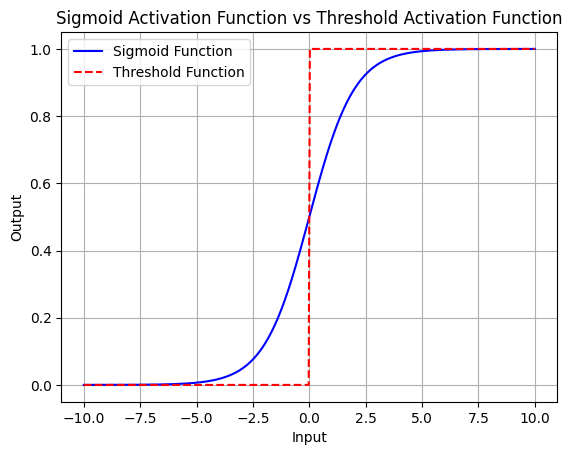

In [8]:
def threshold(x):
    return 1 if x >= 0 else 0

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Plotting the functions
x_vals = np.linspace(-10, 10, 400)
y_sigmoid_vals = sigmoid(x_vals)
y_threshold_vals = [threshold(x) for x in x_vals]

plt.plot(x_vals, y_sigmoid_vals, label="Sigmoid Function", color='blue')
plt.plot(x_vals, y_threshold_vals, label="Threshold Function", color='red', linestyle='--')
plt.legend()
plt.title("Sigmoid Activation Function vs Threshold Activation Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid()
plt.show()

## MLP

definition of **depth** of a nn: the length of the **longest** path from a source to a sink, and we say a graph is deep, if the depth of output neurons is **greater than 2**

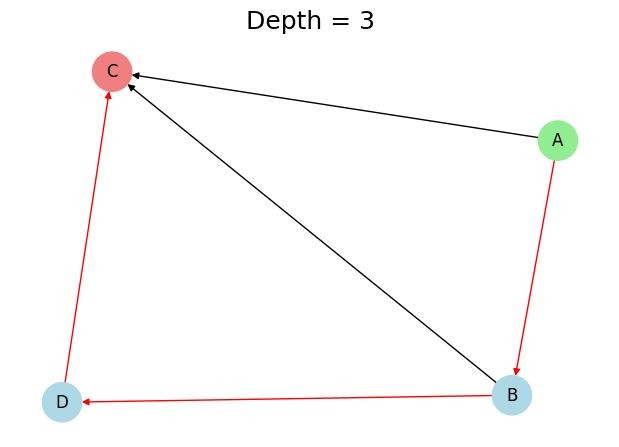

In [36]:
import networkx as nx

G = nx.DiGraph()

G.add_nodes_from(["A", "B", "C", "D"])
G.add_edges_from([("A", "B"), ("B", "C"), ("B", "D"), ("A", "C"), ("D", "C")])

# make source node green, sink node red, others blue
color_map = []
for node in G:
    if node == "A":
        color_map.append('lightgreen')
    elif node == "C":
        color_map.append('lightcoral')
    else:
        color_map.append('lightblue')

# make edge from source to sink with a different color
edge_colors = []
for edge in G.edges():
    if edge == ("A", "B") or edge == ("B", "D") or edge == ("D", "C"):
        edge_colors.append('red')
    else:
        edge_colors.append('black')

plt.figure(figsize=(6,4))
nx.draw(G, with_labels=True, 
        node_size=800, 
        node_color=color_map,
        edge_color=edge_colors,
        )
plt.title("Depth = 3", fontsize=18)
plt.show()

definition of a **layer**: the set of neurons that are all at the **same depth** with respect to the input(source).

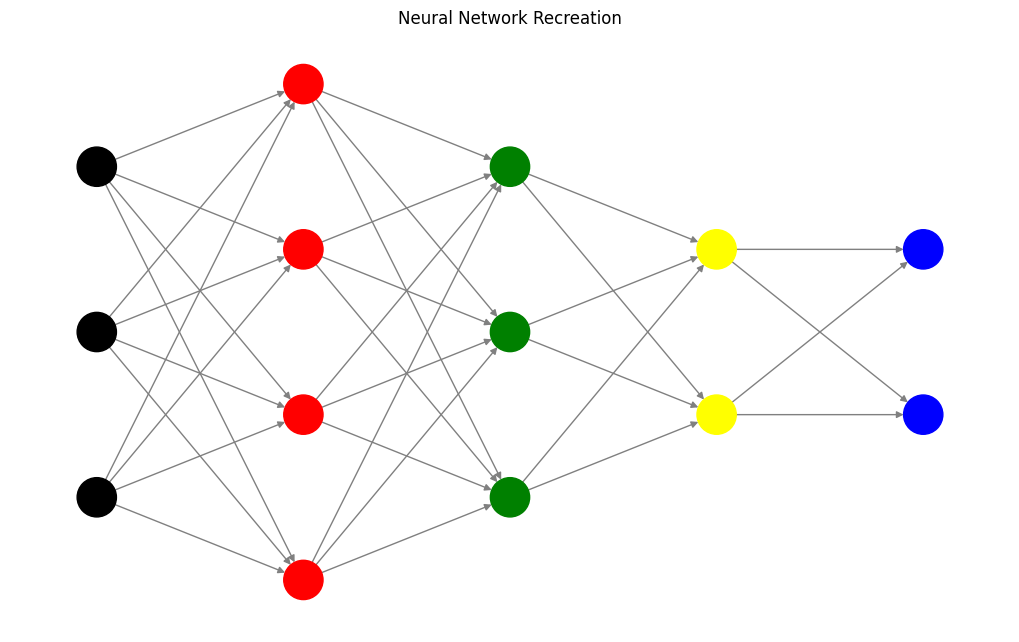

In [42]:
import networkx as nx
import matplotlib.pyplot as plt

# Define layers based on the image structure
layers = [3, 4, 3, 2, 2]
colors = ['black', 'red', 'green', 'yellow', 'blue']

G = nx.DiGraph()

# Create nodes and positions
pos = {}
node_colors = []
for i, count in enumerate(layers):
    for j in range(count):
        node_id = f"{i}_{j}"
        G.add_node(node_id)
        pos[node_id] = (i, -j + count/2) # Centering vertically
        node_colors.append(colors[i])

# Create edges for a fully connected network
for i in range(len(layers) - 1):
    for j in range(layers[i]):
        for k in range(layers[i+1]):
            G.add_edge(f"{i}_{j}", f"{i+1}_{k}")

# Draw the graph
plt.figure(figsize=(10, 6))
nx.draw(G, pos, node_color=node_colors, with_labels=False, 
        node_size=800, edge_color='gray', arrows=True)
plt.title("Neural Network Recreation")
plt.show()

The MLP models a relationship between input and output.
- MLPs are universal boolean functions
- MLPs can compose category functions(classifiers)
- MLPs can compose real-valued functions

## Perceptron as a Universal Logic Gates
Notes about the weight of perceptron has 1 and -1 where -1 means the negate of the input. The definition of universal and is that it can AND any number of inputs with the assumption of any subset of who may be negated.
![universal_and](asserts/univeral_and.png)


Only need *1* hidden layers to compose ANY Boolean MLP: 
boolean function are truth tables, and truth tables show all input combinations for which output is 1.
**A one-hidden-layer MLP is a Universal Boolean Function**
![mlp_bool](asserts/mlp_bool.png)

**The maximum number of proceptrons in the hidden layers is $w^{N-1}$ where N is the number of inputs**
based on Karnaugh Map, we can find the minimum number of clauses to repersent the boolean function, and the maximum number of irreducible DNF is $w^{N-1}$


For a deeper MLP, we can use **3(N-1)** perceptrons in **$2log_2(N)$** layers with divide and conqure approach
Since checkerboard pattern repersent the XOR DNF, and each XOR can be represented with 3 perceptrons.
![mlp_xor](asserts/xor_mlp.png)

If we have fixed number of layers, it will require $$O(2^{CN})$$ neurons in the Kth layer, where $C = 2^{-(K-1)/2}$



512

## Questions:
1. For the number of layers to repersent xor, why the formula is $2 * log_2{N}$, where is this 2 comes from? 
2. In the K hidden layer case, how does the $O(2^{CN})$ where $C= 2^{-(K-1)/2}$ function comes out?